####Name: Aryan Jamwal
####Reg No: RA1811031010019
####Dept: CSE-IT
####Section: K1

####Importing Libraries

In [501]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Reading Data

In [502]:
df = pd.read_csv('/content/aug_train.csv')

#### Data Exploration

In [503]:
df.shape

(19158, 14)

In [504]:
df.mean()

enrollee_id               16875.358179
city_development_index        0.828848
training_hours               65.366896
target                        0.249348
dtype: float64

In [505]:
df.min()


enrollee_id                                     1
city                                       city_1
city_development_index                      0.448
relevent_experience       Has relevent experience
training_hours                                  1
target                                          0
dtype: object

In [506]:
df.max()

enrollee_id                                33380
city                                     city_99
city_development_index                     0.949
relevent_experience       No relevent experience
training_hours                               336
target                                         1
dtype: object

In [507]:
df.var()


enrollee_id               9.247308e+07
city_development_index    1.521812e-02
training_hours            3.607019e+03
target                    1.871831e-01
dtype: float64

In [508]:
df.kurtosis()


enrollee_id              -1.196157
city_development_index   -0.538532
training_hours            3.840539
target                   -0.657217
dtype: float64

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [510]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [511]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


#### Data Cleaning

In [512]:
df.drop(['enrollee_id'],axis=1,inplace=True)
df.drop(['city'],axis=1,inplace=True)
df.drop(['company_size'],axis=1,inplace=True)
df.drop(['last_new_job'],axis=1,inplace=True)

In [513]:
df.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_type              6140
training_hours               0
target                       0
dtype: int64

In [514]:
df.isnull().mean()

city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_type              0.320493
training_hours            0.000000
target                    0.000000
dtype: float64

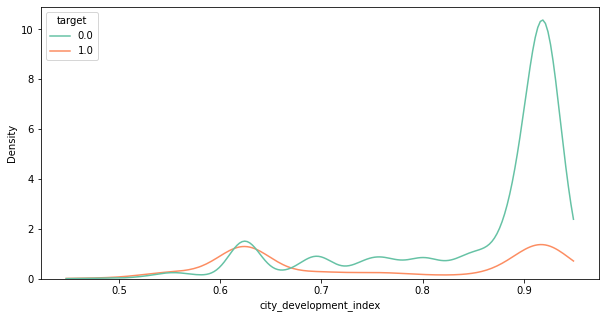

In [515]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette='Set2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

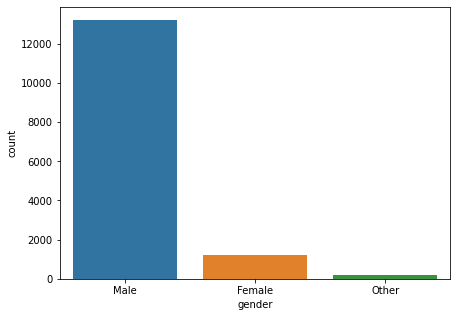

In [516]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.gender)

plt.xticks(rotation=0)

In [517]:
df['gender'].isnull().sum()

4508

In [518]:
df["gender"].fillna("Male", inplace = True)
sex = pd.get_dummies(df['gender'])
df.drop(['gender'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df.drop(['Other'],axis=1,inplace=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


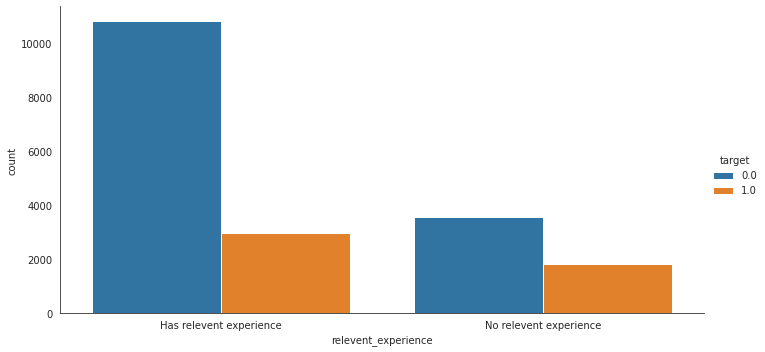

In [519]:
with sns.axes_style('white'):
    rel_exp = sns.factorplot("relevent_experience", data=df, aspect=2.0, kind='count',
                       hue='target')

In [520]:
rel_exp = pd.get_dummies(df['relevent_experience'])
df.drop(['relevent_experience'],axis=1,inplace=True)
df = pd.concat([df,rel_exp],axis=1)
df.drop(['No relevent experience'],axis=1,inplace=True)

In [521]:
df["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [522]:
df["enrolled_university"].fillna("no_enrollment", inplace = True)
enrol_uni = pd.get_dummies(df['enrolled_university'])
df.drop(['enrolled_university'],axis=1,inplace=True)
df = pd.concat([df,enrol_uni],axis=1)
df.drop(['Part time course'],axis=1,inplace=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


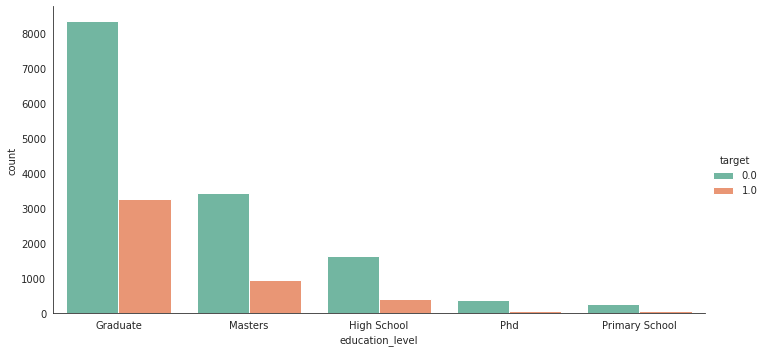

In [523]:
with sns.axes_style('white'):
    rel_exp = sns.factorplot("education_level", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'Set2')

In [524]:
df["education_level"].fillna("Graduate", inplace = True)
edu_level = pd.get_dummies(df['education_level'])
df.drop(['education_level'],axis=1,inplace=True)
df = pd.concat([df,edu_level],axis=1)

df.drop(['Phd','Primary School'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

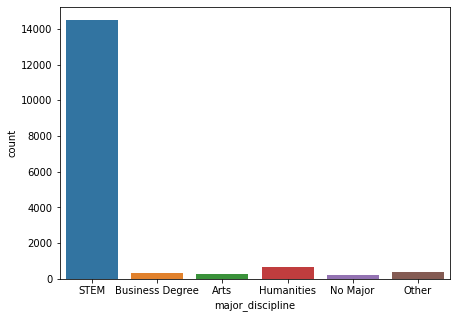

In [525]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.major_discipline)
plt.xticks(rotation=0)

In [526]:
df["major_discipline"].fillna("STEM", inplace = True)
m_disci = pd.get_dummies(df['major_discipline'])
df.drop(['major_discipline'],axis=1,inplace=True)
df= pd.concat([df,m_disci],axis=1)

df.drop(['Business Degree','Arts','Humanities','No Major','Other'],axis=1,inplace=True)

In [527]:
df["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [528]:
df["experience"].fillna("20", inplace = True)
df.replace({"experience":{">20":20,"<1":1}},inplace = True)

In [529]:
df["experience"]= df["experience"].astype("int64")

In [530]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


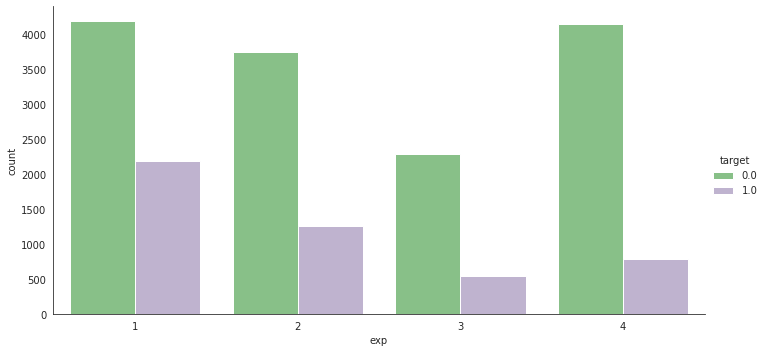

In [531]:
def exp(x):
    if  (x['experience'])  >= 1 and (x['experience'])  <= 5 :
        return 1
    elif  (x['experience'])  >= 6 and (x['experience'])  <= 10 :
        return 2
    elif  (x['experience'])  >= 11 and (x['experience'])  <= 15 :
        return 3
    else :
        return 4

df['exp'] = df.apply(exp, axis = 1)

with sns.axes_style('white'):
    rel_exp = sns.catplot("exp", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'Accent')

In [532]:
df.drop(['experience'],axis=1,inplace=True)
df.drop(['exp'],axis=1,inplace=True)

In [533]:
df["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


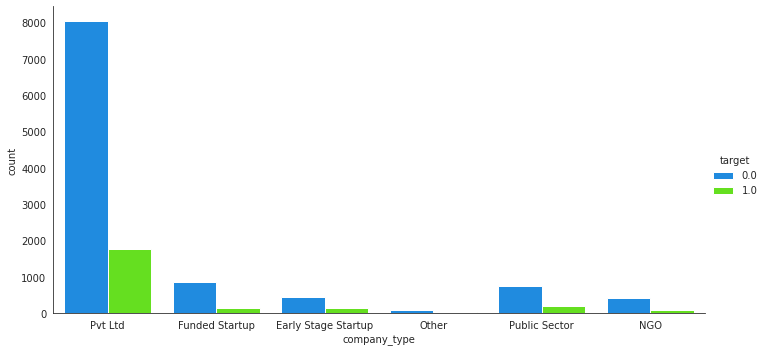

In [534]:
with sns.axes_style('white'):
    c_type = sns.catplot("company_type", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'gist_rainbow_r')

In [535]:
df["company_type"].fillna("Pvt Ltd", inplace = True)
c_type = pd.get_dummies(df['company_type'])
df.drop(['company_type'],axis=1,inplace=True)
df = pd.concat([df,c_type],axis=1)

df.drop(['Funded Startup','Early Stage Startup','NGO','Other'],axis=1,inplace=True)

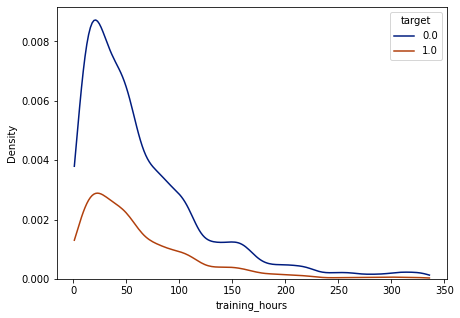

In [536]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="training_hours",hue='target',cut=0,palette='dark')

In [537]:
df.head()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,36,1.0,0,1,1,0,1,1,0,0,1,0,1
1,0.776,47,0.0,0,1,0,0,1,1,0,0,1,0,1
2,0.624,83,0.0,0,1,0,1,0,1,0,0,1,0,1
3,0.789,52,1.0,0,1,0,0,1,1,0,0,0,0,1
4,0.767,8,0.0,0,1,1,0,1,0,0,1,1,0,0


In [538]:
df.tail()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
19153,0.878,42,1.0,0,1,0,0,1,1,0,0,0,0,1
19154,0.920,52,1.0,0,1,1,0,1,1,0,0,1,0,1
19155,0.920,44,0.0,0,1,1,0,1,1,0,0,1,0,1
19156,0.802,97,0.0,0,1,1,0,1,0,1,0,1,0,1
19157,0.855,127,0.0,0,1,0,0,1,0,0,0,1,0,1


In [539]:
df.isnull().sum()

city_development_index     0
training_hours             0
target                     0
Female                     0
Male                       0
Has relevent experience    0
Full time course           0
no_enrollment              0
Graduate                   0
High School                0
Masters                    0
STEM                       0
Public Sector              0
Pvt Ltd                    0
dtype: int64

In [540]:
from sklearn.preprocessing import MinMaxScaler
df.training_hours = MinMaxScaler().fit_transform(np.array(df.training_hours).reshape(-1,1))

In [541]:
df.head()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,0.104478,1.0,0,1,1,0,1,1,0,0,1,0,1
1,0.776,0.137313,0.0,0,1,0,0,1,1,0,0,1,0,1
2,0.624,0.244776,0.0,0,1,0,1,0,1,0,0,1,0,1
3,0.789,0.152239,1.0,0,1,0,0,1,1,0,0,0,0,1
4,0.767,0.020896,0.0,0,1,1,0,1,0,0,1,1,0,0


In [542]:
df.shape

(19158, 14)

In [543]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

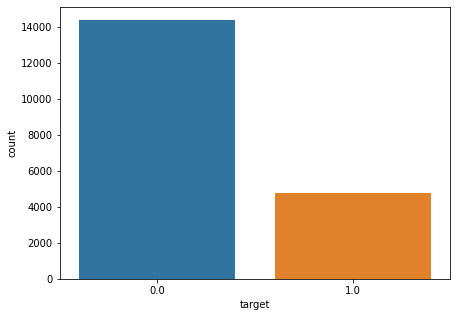

In [544]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.target)
plt.xticks(rotation=0)

#### Data Splitting

In [545]:
y = df['target']
features_col = ['city_development_index', 'training_hours',
       'Female', 'Male', 'Has relevent experience', 'Full time course',
       'no_enrollment', 'Graduate', 'High School', 'Masters', 'STEM', 'Public Sector', 'Pvt Ltd']
X = df[features_col]

In [546]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.30,random_state = 0)

#### Using SMOTE Technique

In [547]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [548]:
y_smote#.value_counts() 
pd.DataFrame(y_smote).value_counts() 

1.0    14381
0.0    14381
dtype: int64

In [549]:
X_smote.shape

(28762, 13)

#### Building Models

In [550]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(gbc_model, X_smote, y_smote, scoring='accuracy', cv=folds)
scores

array([0.75595342, 0.75647488, 0.75538943, 0.75399861, 0.75521558])

In [551]:
scores.mean()*100,scores.std()*100

(75.54063828825355, 0.08318001706240719)

In [552]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [553]:
from sklearn.ensemble import GradientBoostingClassifier
# Define model
gbc_model = GradientBoostingClassifier()
# Fit model
gbc_model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [554]:
print(confusion_matrix(test_y,gbc_model.predict(test_X)))

[[3887  428]
 [ 806  627]]


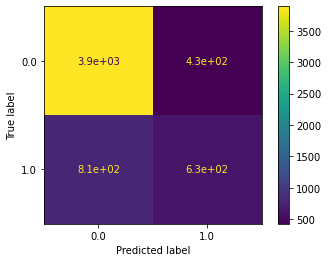

In [555]:
cm=confusion_matrix(test_y,gbc_model.predict(test_X))
gbc_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gbc_model.classes_)
gbc_display.plot()

In [556]:
print(classification_report(test_y,gbc_model.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4315
         1.0       0.59      0.44      0.50      1433

    accuracy                           0.79      5748
   macro avg       0.71      0.67      0.68      5748
weighted avg       0.77      0.79      0.77      5748



In [557]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,gbc_model.predict(test_X)))

0.7853166318719554


In [558]:
from xgboost import XGBClassifier
# Define model
xg = XGBClassifier(max_depth=5)
# Fit model
xg.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [559]:
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_smote, y_smote, scoring='accuracy', cv=folds)
scores

array([0.77346683, 0.76526213, 0.78066759, 0.772879  ])

In [560]:
scores.mean()*100,scores.std()*100

(77.30688898133948, 0.5451609162767113)

In [561]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [562]:
print(confusion_matrix(test_y,xg.predict(test_X)))

[[3915  400]
 [ 777  656]]


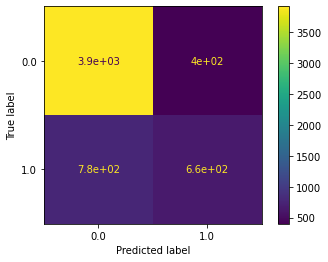

In [563]:
cm=confusion_matrix(test_y,xg.predict(test_X))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xg.classes_)
cm_display.plot()

In [564]:
from sklearn.metrics import classification_report
print(classification_report(test_y,xg.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      4315
         1.0       0.62      0.46      0.53      1433

    accuracy                           0.80      5748
   macro avg       0.73      0.68      0.70      5748
weighted avg       0.78      0.80      0.78      5748



In [565]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,xg.predict(test_X)))

0.7952331245650661
